# Clusterização

#### 1 - Carga de dados após EAD

In [54]:
import pandas as pd

df = pd.read_pickle("../../Data/Processed/df_2009.pkl") 

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Winter,Spring,Summer,Autunum
1074636,0.484,0.062,247.860001,2.2,0.0,0.0,0.0,1,1,0,0,0
1074637,0.484,0.062,247.720001,2.2,0.0,0.0,0.0,1,1,0,0,0
1074638,0.482,0.062,247.750000,2.2,0.0,0.0,0.0,1,1,0,0,0
1074639,0.482,0.060,247.520004,2.2,0.0,0.0,0.0,1,1,0,0,0
1074640,0.482,0.062,246.940002,2.2,0.0,0.0,0.0,1,1,0,0,0


#### 2 - Normalizando os dados

> Dadas as variações de escala das informações é necessário normalizar o datatset

In [55]:
from sklearn.preprocessing import StandardScaler

# Referência = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()

data_scaled = scaler.fit_transform(df)

df_s = pd.DataFrame(data_scaled, columns=df.columns)

df_s

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Winter,Spring,Summer,Autunum
0,-0.589470,-0.592890,2.012011,-0.559052,-0.181443,-0.214887,-0.795943,-1.597225,1.739132,-0.583682,-0.571308,-0.579412
1,-0.589470,-0.592890,1.964794,-0.559052,-0.181443,-0.214887,-0.795943,-1.597225,1.739132,-0.583682,-0.571308,-0.579412
2,-0.591452,-0.592890,1.974912,-0.559052,-0.181443,-0.214887,-0.795943,-1.597225,1.739132,-0.583682,-0.571308,-0.579412
3,-0.591452,-0.609975,1.897342,-0.559052,-0.181443,-0.214887,-0.795943,-1.597225,1.739132,-0.583682,-0.571308,-0.579412
4,-0.591452,-0.592890,1.701728,-0.559052,-0.181443,-0.214887,-0.795943,-1.597225,1.739132,-0.583682,-0.571308,-0.579412
...,...,...,...,...,...,...,...,...,...,...,...,...
521315,0.661563,0.227149,-0.655757,0.627882,-0.181443,-0.214887,1.303951,1.581364,1.739132,-0.583682,-0.571308,-0.579412
521316,0.701215,0.876347,-0.608540,0.675360,-0.181443,-0.214887,1.420612,1.581364,1.739132,-0.583682,-0.571308,-0.579412
521317,0.699233,0.859263,-0.642263,0.675360,-0.181443,-0.214887,1.303951,1.581364,1.739132,-0.583682,-0.571308,-0.579412
521318,0.707163,0.893431,-0.429790,0.675360,-0.181443,-0.214887,1.303951,1.581364,1.739132,-0.583682,-0.571308,-0.579412


> Utilizando o KMeans

In [56]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

> Técnica do Elbow para determinar o melhor k

In [57]:
centroids = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_s)
    centroids.append(kmeans.inertia_)

In [58]:
centroids

[6255839.999999989,
 5099241.884403523,
 4478874.427546586,
 3733214.238501653,
 3078176.1801399784,
 2660179.425503109,
 2394871.1857703654,
 2155059.30090488,
 1938620.3620096804,
 1754662.3638698328]

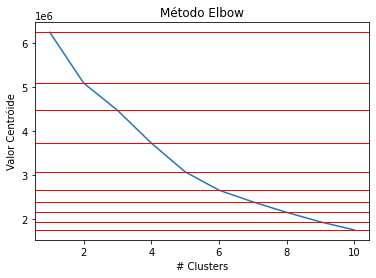

In [59]:
plt.plot(range(1,11), centroids)
plt.title('Método Elbow')
plt.xlabel('# Clusters')
plt.ylabel('Valor Centróide')
for val in centroids:
    plt.axhline(val, color='red', linewidth=1)
plt.show()

> Pelo método Elbow podemos tentar utilizar o k entre 6 e 7. Escolhemos 6 por depois deste a razão de valores diminui pouco.

In [61]:
# Incluindo a clusterização no dataframe original
kmeans = KMeans(n_clusters=6)
num_cluster = kmeans.fit_predict(df_s)
df['Cluster'] = num_cluster

In [62]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Winter,Spring,Summer,Autunum,Cluster
1074636,0.484,0.062,247.860001,2.2,0.0,0.0,0.0,1,1,0,0,0,3
1074637,0.484,0.062,247.720001,2.2,0.0,0.0,0.0,1,1,0,0,0,3
1074638,0.482,0.062,247.750000,2.2,0.0,0.0,0.0,1,1,0,0,0,3
1074639,0.482,0.060,247.520004,2.2,0.0,0.0,0.0,1,1,0,0,0,3
1074640,0.482,0.062,246.940002,2.2,0.0,0.0,0.0,1,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600231,1.746,0.158,239.949997,7.2,0.0,0.0,18.0,12,1,0,0,0,3
1600232,1.786,0.234,240.089996,7.4,0.0,0.0,19.0,12,1,0,0,0,3
1600233,1.784,0.232,239.990005,7.4,0.0,0.0,18.0,12,1,0,0,0,3
1600234,1.792,0.236,240.619995,7.4,0.0,0.0,18.0,12,1,0,0,0,3


> **Potência ativa x Pôtência Área 1** {'Cozinha':['Lava Louças', 'Forno Elétrico', 'Microondas']}

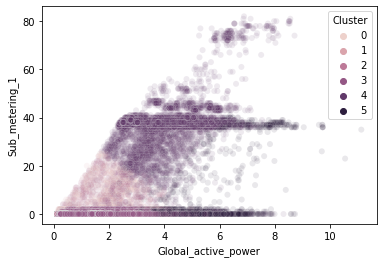

In [50]:
sns.scatterplot(x='Global_active_power', y='Sub_metering_1', data=df, hue='Cluster', alpha=0.1)
plt.show()

> **Potência ativa x Pôtência Área 2** {'Lavanderia':['Máquina de lavar roupa', 'Máquina de secar roupa', 'Refrigerador', 'Lâmpada']}

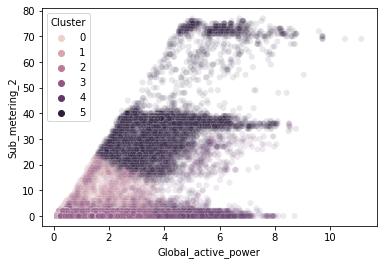

In [51]:
sns.scatterplot(x='Global_active_power', y='Sub_metering_2', data=df, hue='Cluster', alpha=0.1)
plt.show()

> **Potência ativa x Pôtência Área 3** {'Basement?':['Boiler', 'Ar Condicionado']}

C:\Users\marce\.virtualenvs\Code-P0AkfBoR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


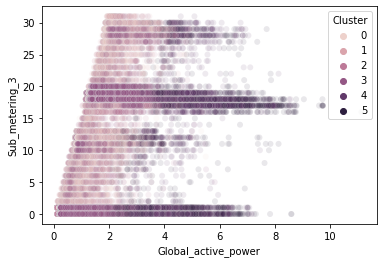

In [52]:
sns.scatterplot(x='Global_active_power', y='Sub_metering_3', data=df, hue='Cluster', alpha=0.1)
plt.show()

> **Potência Ativa consumida no verão, inverno, primavera e outono**

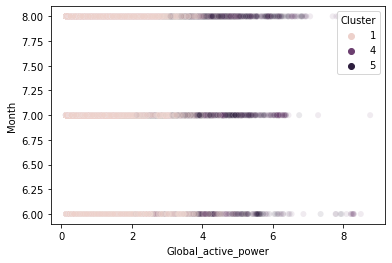

In [67]:
# Verão
sns.scatterplot(x='Global_active_power', y='Month', data=df[df['Summer']==1], hue='Cluster', alpha=0.1)
plt.show()

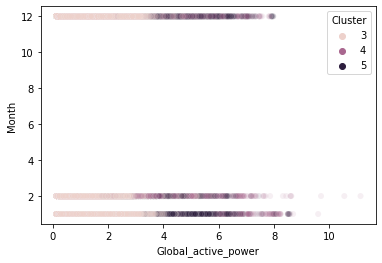

In [68]:
# Inverno
sns.scatterplot(x='Global_active_power', y='Month', data=df[df['Winter']==1], hue='Cluster', alpha=0.1)
plt.show()

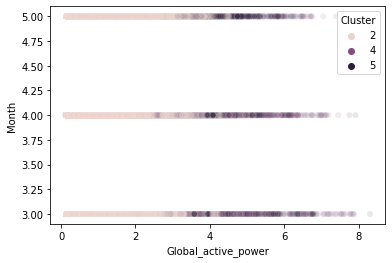

In [69]:
# Primavera
sns.scatterplot(x='Global_active_power', y='Month', data=df[df['Spring']==1], hue='Cluster', alpha=0.1)
plt.show()

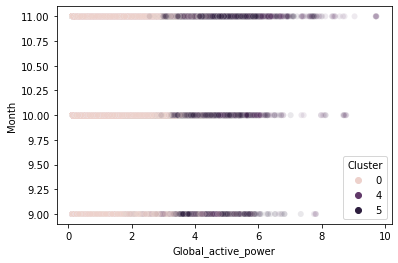

In [70]:
# Outono
sns.scatterplot(x='Global_active_power', y='Month', data=df[df['Autunum']==1], hue='Cluster', alpha=0.1)
plt.show()

> Método da Silhueta para determinar a qualidade dos clusters

In [71]:
from sklearn.metrics import silhouette_score

In [73]:
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(df_s)
    silhouette_scores.append(silhouette_score(df_s, cluster_labels))

KeyboardInterrupt: 

In [ ]:
plt.bar(range(2,11), silhouette_scores)
plt.xlabel('# Clusters')
plt.ylabel('Score')
plt.show()

> Gráfico Silhueta x Scatter Plot

In [ ]:
from matplotlib import cm

In [ ]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(df_s)
silhouette_values = silhouette_samples(df_s, cluster_labels)

y_lower = 0
fig, axes = plt.subplots(1,2, figsize(20,5))
for i in range(n_clusters):
    i_cluster_silhouette = silhouette_values[cluster_labels==i]
    i_cluster_silhouette.sort()
    size_cluster_i = i_cluster_silhouette.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i)/n_clusters)

    axes[0].fill_betweenx(np.arange(y_lower, y_upper), 0, i_cluster_silhouette, facecolor=color, edgecolor=color)

    y_lower = y_upper

    axes[0].set_title('Método da Silhueta')
    axes[0].set_xlabel('Coeficientes')
    axes[0].set_ylabel('Cluster Label')

    silhouette_avg = silhouette_score(df_s, cluster_labels)
    axes[0].axvline(x=silhouette_avg, color = 'red', linestyle = '--')
    axes[0].set_yticks([])
    axes[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Scatter
    color = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    axes[1].scatter(df_s[:,1], df_s[:,5], c=color)
    axes[1].set_title('Scatter Plot')
    axes[1].set_xlabel('Potência Ativa')
    axes[1].set_ylabel('Potência Ativa Área 1')

>Para cada cluster o método pega todos os elementos do cluster e verifica o quanto cada elemento faz parte de um centr[oide e não faz parte dos outros. Ao ordenar dá a visão de quem é mais pertencente ao k específico.

> **Redução de dimensionalidade (PCA)**<br><br>
> Tem como objetivo resumir o problema sem perder a informação. Ao se criar uma componente, esta carrega as informações dos seus vizinhos mais próximos. Ex.: 3 de 12, cada componente carrega a informação de outras 3. O grande problema do PCA é saber se a redução realizada ainda representa a completude dos dados. Temos alguns métodos para verificar isso, como:

* Gráfico com Variância das componentes -  Indica a variância de acordo com a quantidade de features. Quanto maior a quantidade de features, menor a variância e maior a "explicação". Ex.: Com 1 componente perco muito mais informações "menor explicação" do que com todas as componentes.
* Gráfico com razão de variância das componentes - Faz gráfico tipo curva ROC que mostra a razão da variância (%) por componentes. Alí se escolhe qual a quantidade de componentes que explica, por exemplo, 90% das informações.